In [1]:
import pandas as pd

file_path = '../Finals/Evaluation.csv' # Replace with your CSV file path

df = pd.read_csv(file_path)

# The 'df' object is a DataFrame, which automatically handles headers
print(df.head()) # Prints the first 5 rows, including headers

# Accessing column names
print(df.columns)

# Accessing data by column name
# print(df['ColumnName1'])

    file name  seconds  Gun Label  Gun Probability_Vision  \
0  Robbery041        0          1                    0.95   
1  Robbery041        5          1                    0.90   
2  Robbery041       10          1                    0.97   
3  Robbery041       15          1                    0.97   
4  Robbery041       20          1                    0.94   

   Gun Probability_Gemini  Anomaly label  Anomaly score  
0                    0.95              1           1.00  
1                    0.80              1           0.90  
2                    0.80              1           0.90  
3                    0.95              1           0.95  
4                    0.00              1           0.65  
Index(['file name', 'seconds', 'Gun Label', 'Gun Probability_Vision',
       'Gun Probability_Gemini', 'Anomaly label', 'Anomaly score'],
      dtype='object')


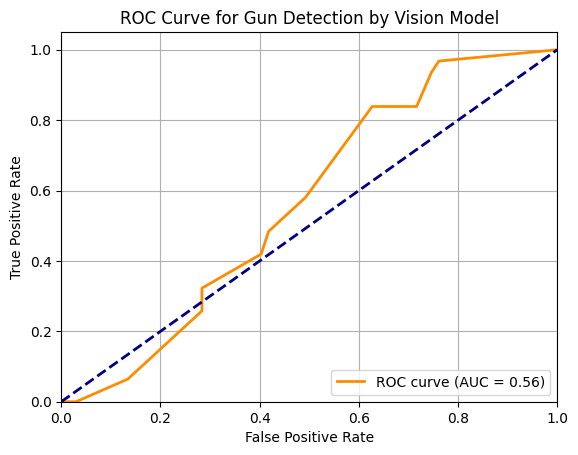

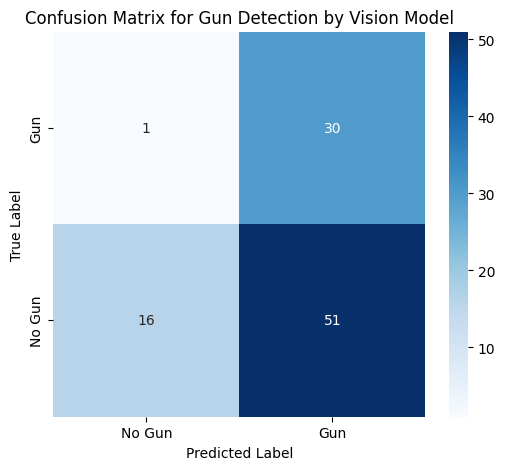

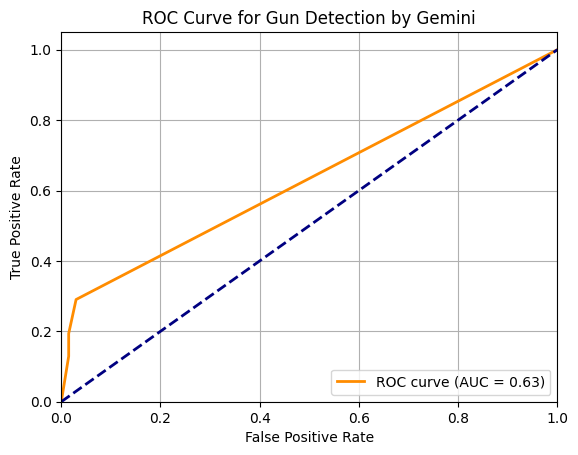

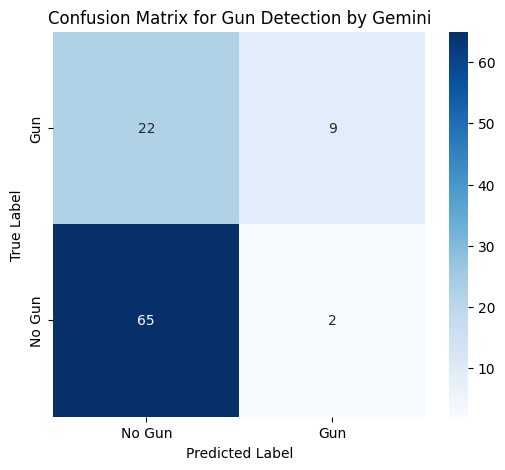

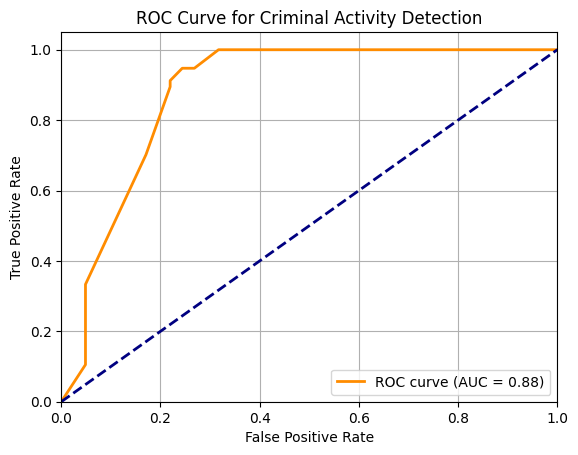

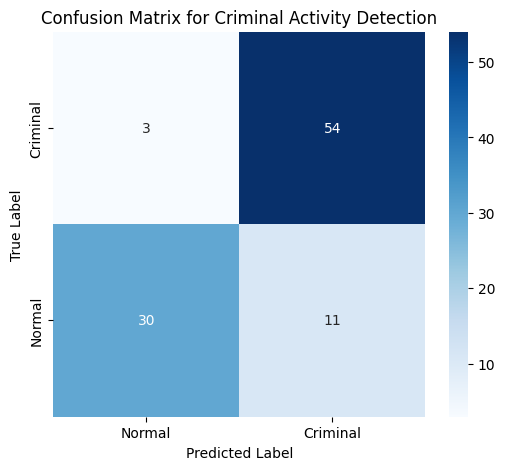

In [27]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(df['Gun Label'], df['Gun Probability_Vision'])
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns




def ROC_and_Confusion_Metric(y_test, y_pred_proba,name,labels):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random classifier
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s'%name)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    y_pred= np.array([1 if y>0.5 else 0 for y in y_pred_proba])
    y_true=np.array(y_test).astype(int)
    combined_sorted = sorted(zip( y_true,y_pred))
    y_true,y_pred = zip(*combined_sorted)
    class_names = ["Normal Activities", "Criminal"] 
    cm = confusion_matrix(y_true,y_pred )

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
    # disp.plot(cmap=plt.cm.Blues) # Choose a colormap, e.g., 'Blues', 'Greens', 'YlGnBu'


    # Custom plot for desired visual layout:
    conf_matrix_display = np.flipud(cm)

    # Define labels for the axes
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix_display,
                annot=True,
                fmt='d', # Format as integer
                cmap='Blues',
                xticklabels=labels,
                yticklabels=labels[::-1])

    # Set axis labels to reflect the desired layout
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for %s'%name)


ROC_and_Confusion_Metric(df['Gun Label'], df['Gun Probability_Vision'],"Gun Detection by Vision Model", labels=["No Gun", "Gun"])
ROC_and_Confusion_Metric(df['Gun Label'], df['Gun Probability_Gemini'],"Gun Detection by Gemini",labels=["No Gun", "Gun"])

ROC_and_Confusion_Metric(df['Anomaly label'], df['Anomaly score'],"Criminal Activity Detection",labels=["Normal", "Criminal"])

